In [1]:
#autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import jax
jax.config.update("jax_enable_x64", True)

In [3]:
from src import ComputationalHypergraphDiscovery as CHD
from src.ComputationalHypergraphDiscovery import interpolatory,non_interpolatory
from src.ComputationalHypergraphDiscovery import helper_functions as hf

In [4]:
import jax.numpy as np
from jax import random

# Example 1

$$\begin{matrix}x_1=w_1\\x_2=w_2 \end{matrix} $$

In [5]:
key = random.PRNGKey(0)
key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))

X=np.concatenate([W[:,:2],W],axis=1)
node_names=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$']    

In [6]:
graph_discovery=CHD.GraphDiscovery(X,node_names)#,kernels=[CHD.Modes.LinearMode()])

Finding ancestors: 100%|██████████| 6/6 [00:15<00:00,  2.55s/it, Finding ancestors of $w_4$]


Kernel [linear] has n/(n+s)=5.007648637252815e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=5.079774292187729e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.0039504921346265355, Z=(0.84, 0.87), gamma=4.53e-02
$x_1$ has ancestors with the kernel [linear] | (n/(s+n)=0.00)
Ancestors of $x_1$: ['$w_1$']



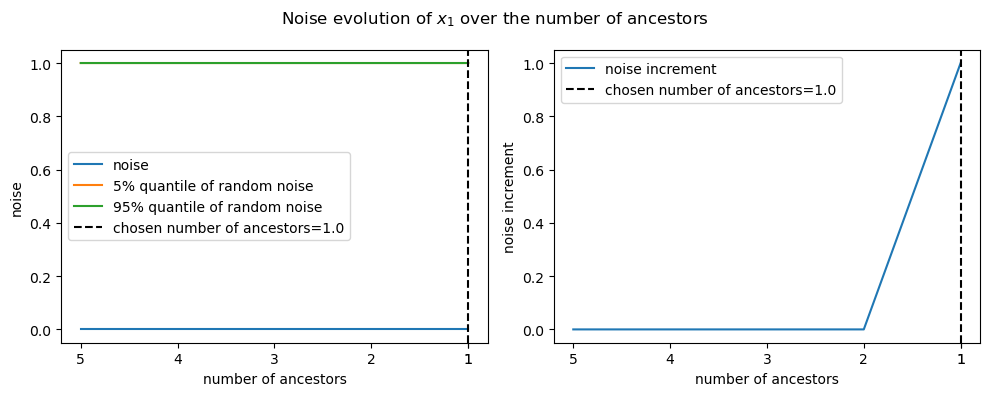

Kernel [linear] has n/(n+s)=5.012000125089104e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=5.038529030777031e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.0036923969613462254, Z=(0.84, 0.87), gamma=4.51e-02
$x_2$ has ancestors with the kernel [linear] | (n/(s+n)=0.00)
Ancestors of $x_2$: ['$w_2$']



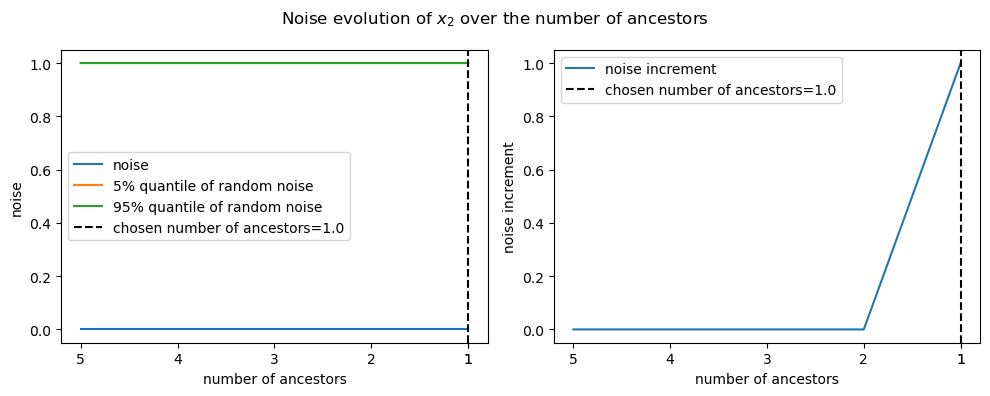

Kernel [linear] has n/(n+s)=5.007643171763516e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=5.079265053376699e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.003950492134629488, Z=(0.84, 0.87), gamma=4.53e-02
$w_1$ has ancestors with the kernel [linear] | (n/(s+n)=0.00)
Ancestors of $w_1$: ['$x_1$']



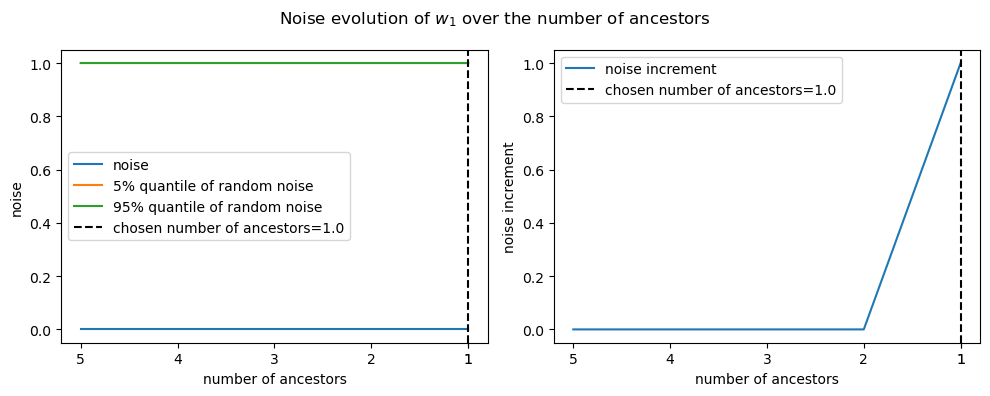

Kernel [linear] has n/(n+s)=5.01200887216907e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=5.038372120784373e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.003692396961344865, Z=(0.84, 0.87), gamma=4.51e-02
$w_2$ has ancestors with the kernel [linear] | (n/(s+n)=0.00)
Ancestors of $w_2$: ['$x_2$']



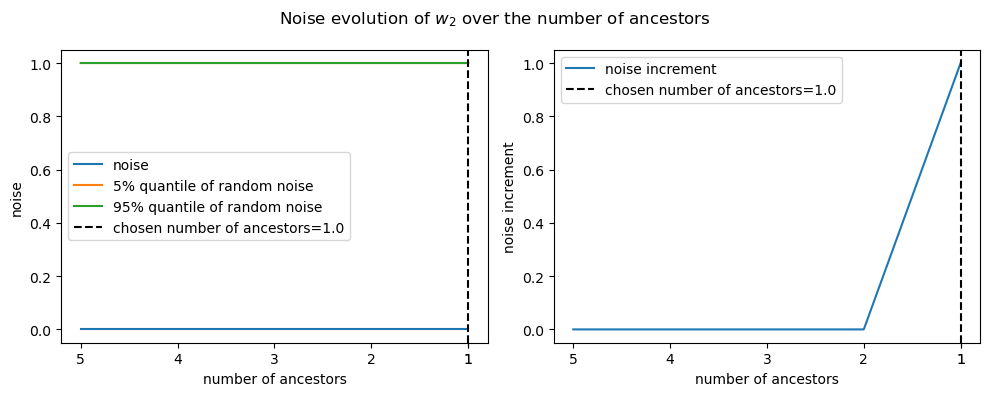

Kernel [linear] has n/(n+s)=0.9993155231868839, Z=(1.00, 1.00), gamma=9.97e+02
Kernel [quadratic] has n/(n+s)=0.9977502892540305, Z=(1.00, 1.00), gamma=9.87e+02
Kernel [gaussian] has n/(n+s)=0.9284812907318742, Z=(0.92, 0.94), gamma=1.19e-04
$w_3$ has no ancestors

Kernel [linear] has n/(n+s)=0.9991431746435814, Z=(1.00, 1.00), gamma=9.96e+02
Kernel [quadratic] has n/(n+s)=0.9981532694453729, Z=(1.00, 1.00), gamma=9.90e+02
Kernel [gaussian] has n/(n+s)=0.9234953312006231, Z=(0.92, 0.94), gamma=1.23e-04
$w_4$ has no ancestors



In [7]:
graph_discovery.fit()

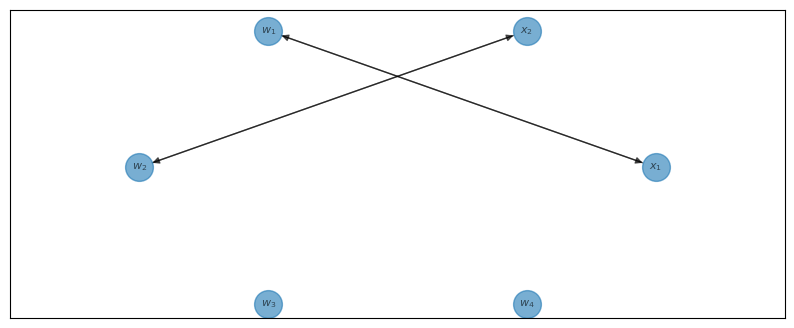

In [8]:
graph_discovery.plot_graph(type_label=False)

# Example 2

$$\begin{matrix}x_1&=&w_1\\x_2&=&x_1^2+1+0.1w_2\\x_3&=&w_3 \end{matrix} $$

In [9]:

key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))
X1=W[:,0]
X2=X1**2+1+0.1*W[:,1]
X3=W[:,2]
X=np.concatenate([np.stack([X1,X2,X3],axis=1),W],axis=1)
node_names=['$x_1$','$x_2$','$x_3$','$w_1$','$w_2$','$w_3$','$w_4$']   

In [10]:
graph_discovery=CHD.GraphDiscovery(X,node_names)

Finding ancestors: 100%|██████████| 7/7 [00:19<00:00,  2.75s/it, Finding ancestors of $w_4$]


Kernel [linear] has n/(n+s)=5.074344942721284e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=9.39054289652438e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.005429572995885305, Z=(0.84, 0.86), gamma=3.31e-01
$x_1$ has ancestors with the kernel [linear] | (n/(s+n)=0.00)
Ancestors of $x_1$: ['$w_1$']



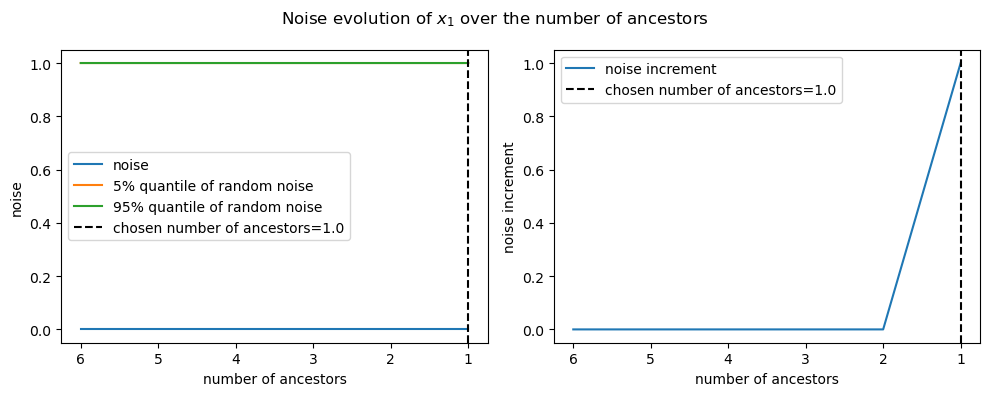

Kernel [linear] has n/(n+s)=0.9950674805471155, Z=(1.00, 1.00), gamma=9.75e+02
Kernel [quadratic] has n/(n+s)=2.6881991026024924e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.002757457638832192, Z=(0.83, 0.86), gamma=1.75e-01
$x_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $x_2$: ['$x_1$', '$w_1$', '$w_2$']



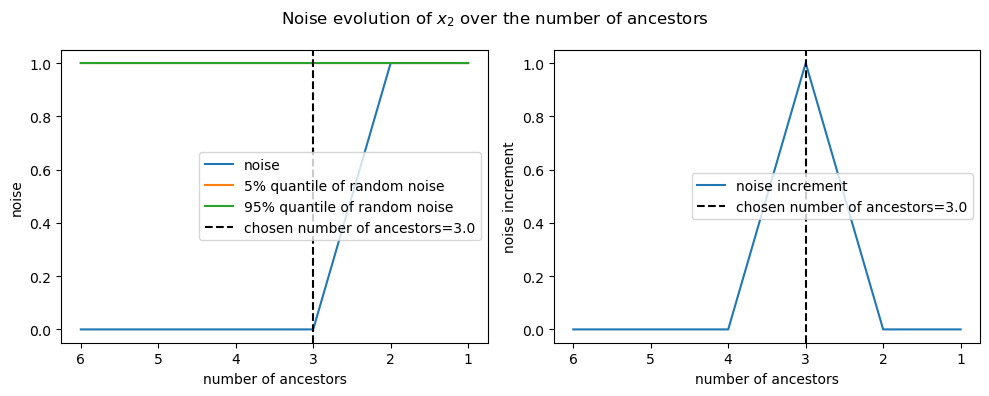

Kernel [linear] has n/(n+s)=5.014395873338748e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=5.129244263548528e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.00588934281597768, Z=(0.83, 0.87), gamma=1.67e-01
$x_3$ has ancestors with the kernel [linear] | (n/(s+n)=0.00)
Ancestors of $x_3$: ['$w_3$']



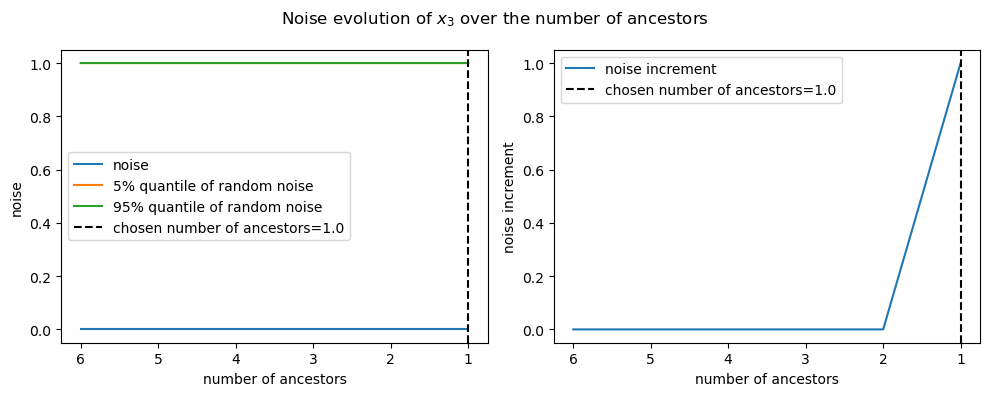

Kernel [linear] has n/(n+s)=5.074343949391147e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=9.39060161128507e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.005429572995885417, Z=(0.84, 0.87), gamma=3.31e-01
$w_1$ has ancestors with the kernel [linear] | (n/(s+n)=0.00)
Ancestors of $w_1$: ['$x_1$']



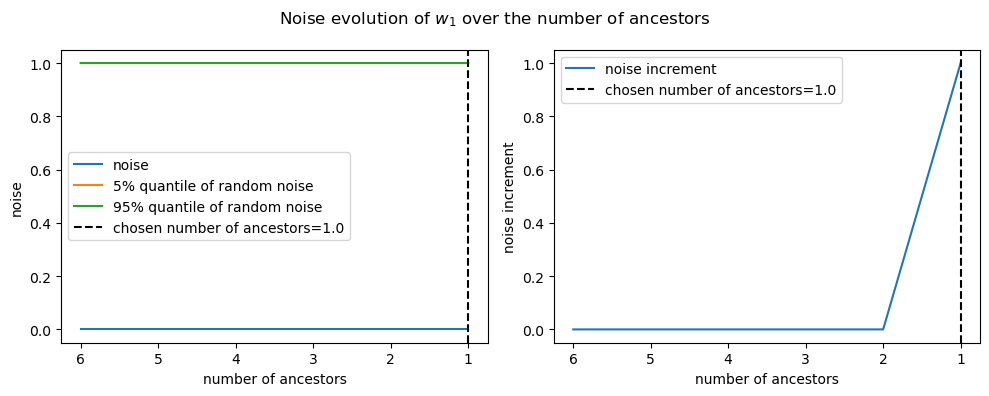

Kernel [linear] has n/(n+s)=0.9967578843082873, Z=(1.00, 1.00), gamma=9.86e+02
Kernel [quadratic] has n/(n+s)=1.973284258648465e-10, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.019948913466196483, Z=(0.88, 0.91), gamma=8.78e-03
$w_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $w_2$: ['$x_1$', '$x_2$']



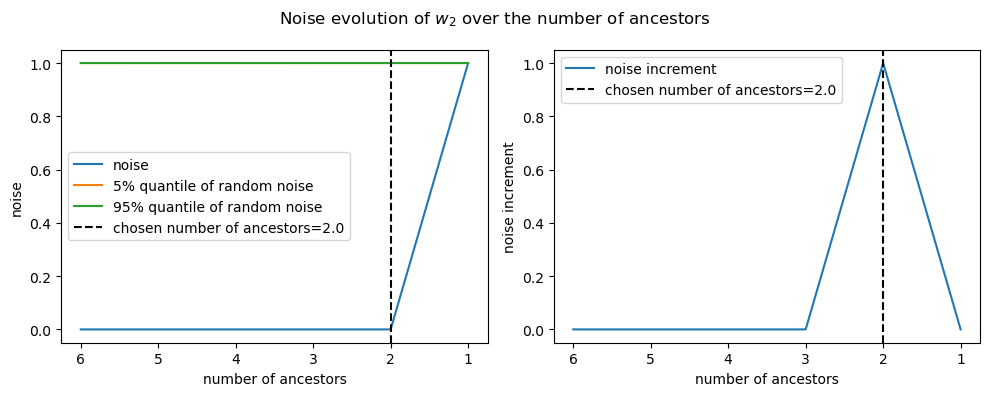

Kernel [linear] has n/(n+s)=5.014395111537516e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=5.129251640741671e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.00588934281598052, Z=(0.83, 0.86), gamma=1.67e-01
$w_3$ has ancestors with the kernel [linear] | (n/(s+n)=0.00)
Ancestors of $w_3$: ['$x_3$']



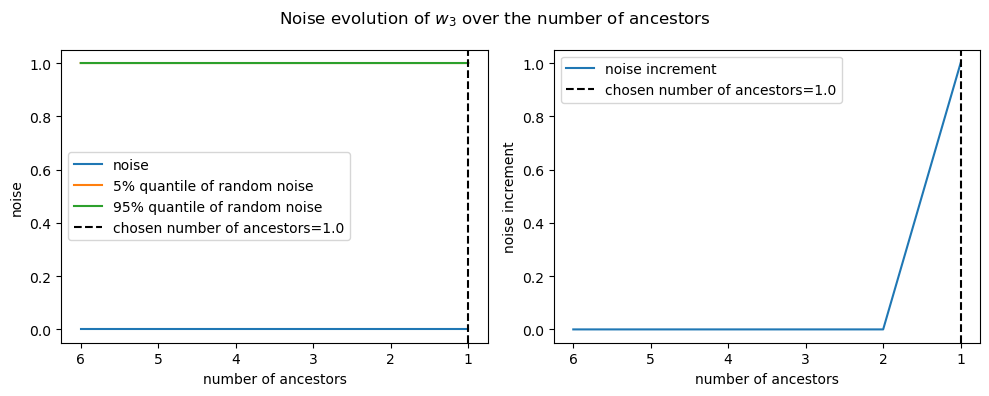

Kernel [linear] has n/(n+s)=0.9992728139736985, Z=(1.00, 1.00), gamma=9.96e+02
Kernel [quadratic] has n/(n+s)=0.9976129906935082, Z=(1.00, 1.00), gamma=9.86e+02
Kernel [gaussian] has n/(n+s)=0.9123512851979084, Z=(0.91, 0.93), gamma=1.39e-03
$w_4$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.91)
Ancestors of $w_4$: ['$x_2$', '$w_2$', '$w_3$']



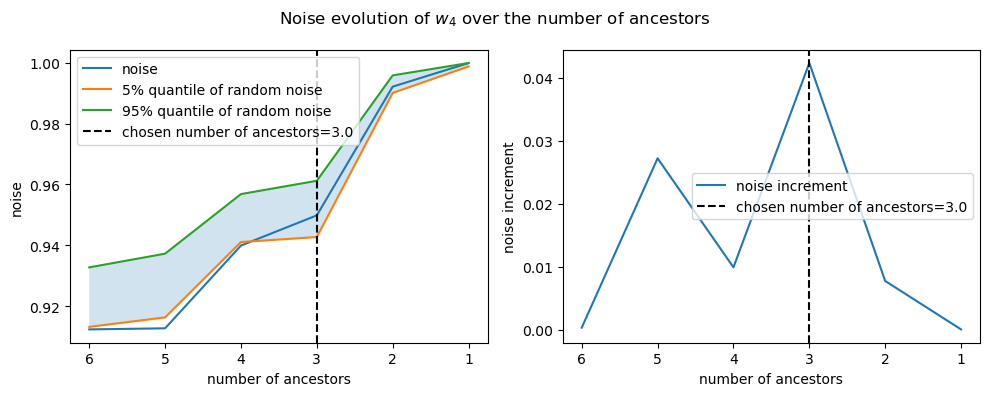

In [11]:
graph_discovery.fit()

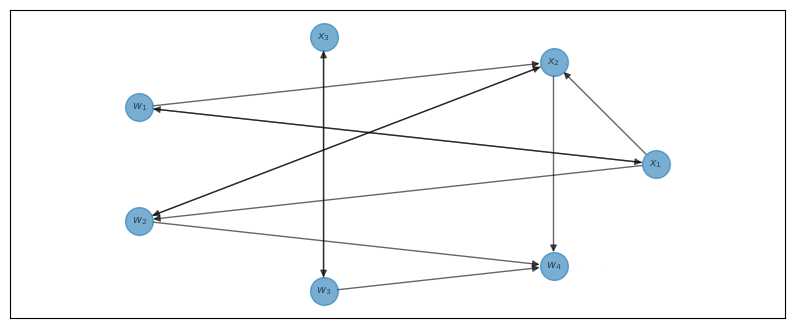

In [12]:
graph_discovery.plot_graph(type_label=False)

# Example 3

$$\begin{matrix}x_1&=&w_1w_2\\x_2&=&w_2\sin(w_4)\end{matrix} $$

In [13]:
key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))
X1=W[:,0]*W[:,1]
X2=W[:,1]*np.sin(W[:,3])
X=np.concatenate([np.stack([X1,X2],axis=1),W],axis=1)
node_names=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$'] 
  

In [14]:
graph_discovery=CHD.GraphDiscovery(X,node_names)

Finding ancestors:   0%|          | 0/6 [00:00<?, ?it/s, Finding ancestors of $x_1$]

Finding ancestors: 100%|██████████| 6/6 [00:15<00:00,  2.55s/it, Finding ancestors of $w_4$]

Kernel [linear] has n/(n+s)=0.9996230091699854, Z=(1.00, 1.00), gamma=9.98e+02
Kernel [quadratic] has n/(n+s)=5.539667747418247e-13, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.001195772093297785, Z=(0.83, 0.86), gamma=9.21e-02
$x_1$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $x_1$: ['$w_1$', '$w_2$']



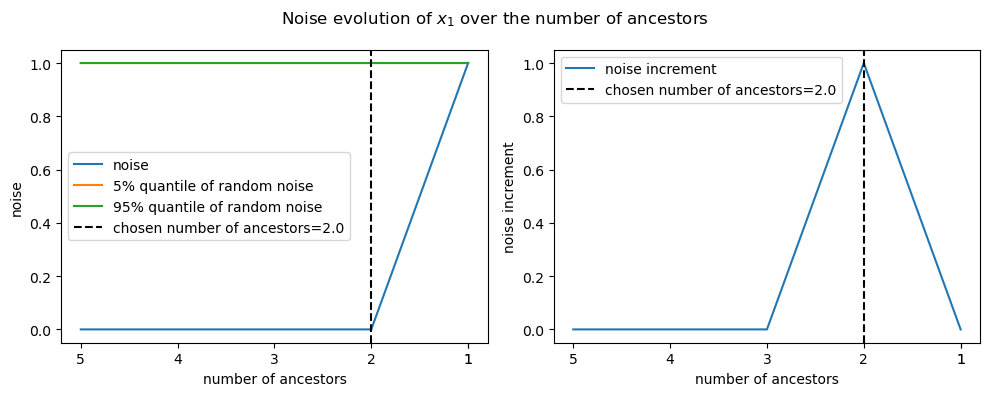

Kernel [linear] has n/(n+s)=0.9989215451614148, Z=(1.00, 1.00), gamma=9.95e+02
Kernel [quadratic] has n/(n+s)=0.7476557237478941, Z=(1.00, 1.00), gamma=1.51e+02
Kernel [gaussian] has n/(n+s)=0.04343797257614267, Z=(0.84, 0.87), gamma=7.48e-02
$x_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.04)
Ancestors of $x_2$: ['$w_2$', '$w_4$']



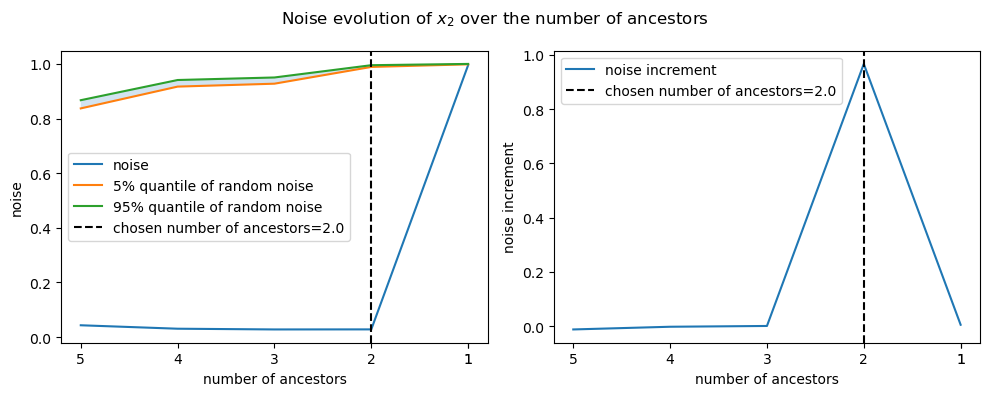

Kernel [linear] has n/(n+s)=0.9986058479249883, Z=(1.00, 1.00), gamma=9.94e+02
Kernel [quadratic] has n/(n+s)=0.9482889332431987, Z=(0.99, 1.00), gamma=6.43e+02
Kernel [gaussian] has n/(n+s)=0.8731721686349121, Z=(0.85, 0.88), gamma=3.82e-02
$w_1$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.95)
Ancestors of $w_1$: ['$x_1$', '$w_2$']



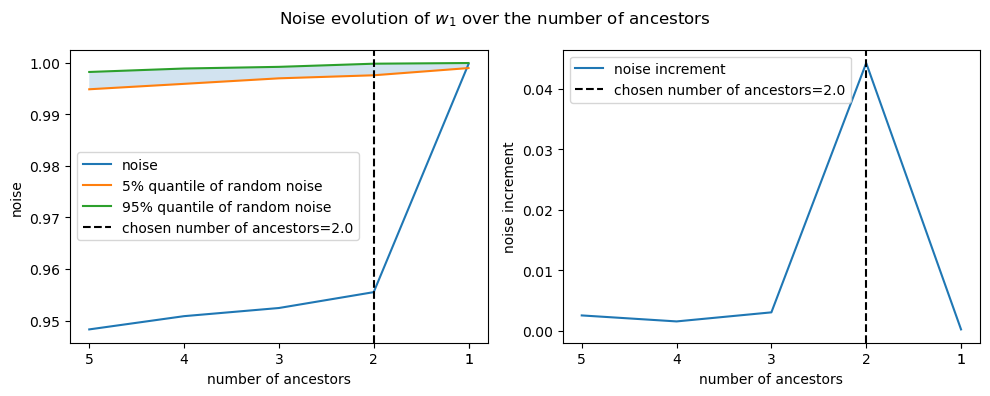

Kernel [linear] has n/(n+s)=0.9984382159090663, Z=(1.00, 1.00), gamma=9.93e+02
Kernel [quadratic] has n/(n+s)=0.8933717854048463, Z=(1.00, 1.00), gamma=3.35e+02
Kernel [gaussian] has n/(n+s)=0.8214033677241678, Z=(0.84, 0.87), gamma=8.93e-02
$w_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.82)
Ancestors of $w_2$: ['$x_1$', '$x_2$', '$w_1$', '$w_3$', '$w_4$']



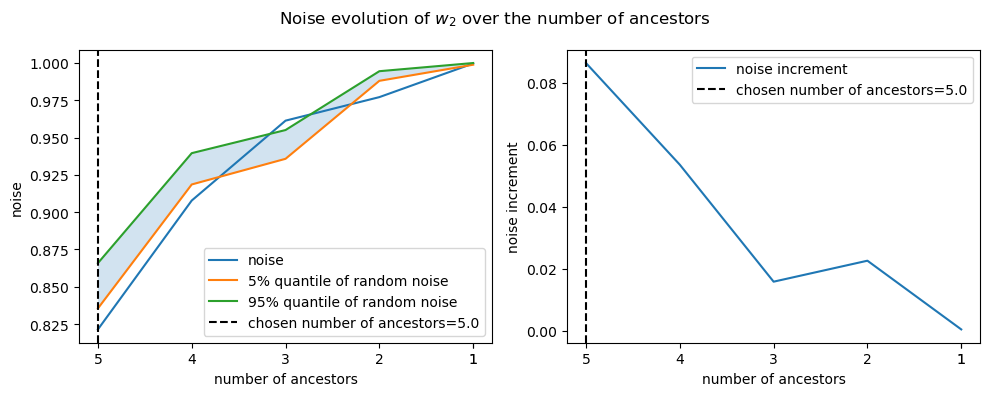

Kernel [linear] has n/(n+s)=0.9991714429679727, Z=(1.00, 1.00), gamma=9.96e+02
Kernel [quadratic] has n/(n+s)=0.9980203398784476, Z=(0.99, 1.00), gamma=9.88e+02
Kernel [gaussian] has n/(n+s)=0.9326693544119591, Z=(0.90, 0.93), gamma=1.85e-03
$w_3$ has no ancestors

Kernel [linear] has n/(n+s)=0.9981674111286347, Z=(1.00, 1.00), gamma=9.92e+02
Kernel [quadratic] has n/(n+s)=0.9635974447076064, Z=(0.99, 1.00), gamma=7.18e+02
Kernel [gaussian] has n/(n+s)=0.888017977495956, Z=(0.86, 0.89), gamma=2.84e-02
$w_4$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.96)
Ancestors of $w_4$: ['$x_2$', '$w_2$']



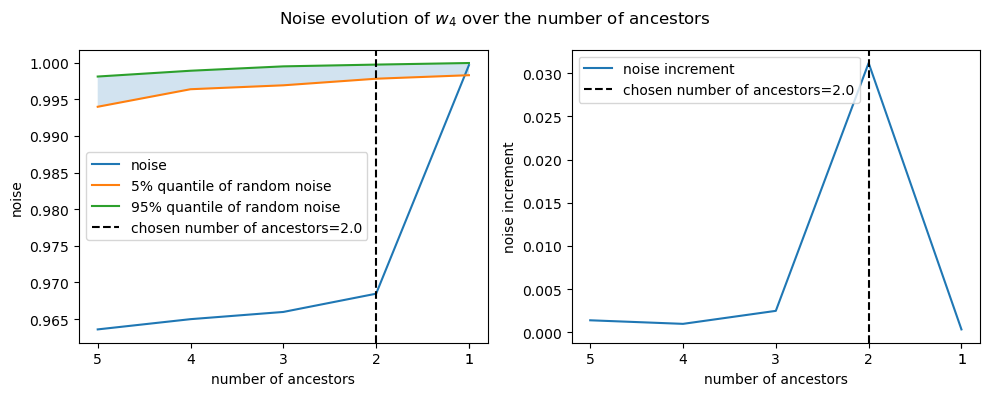

In [15]:
graph_discovery.fit()

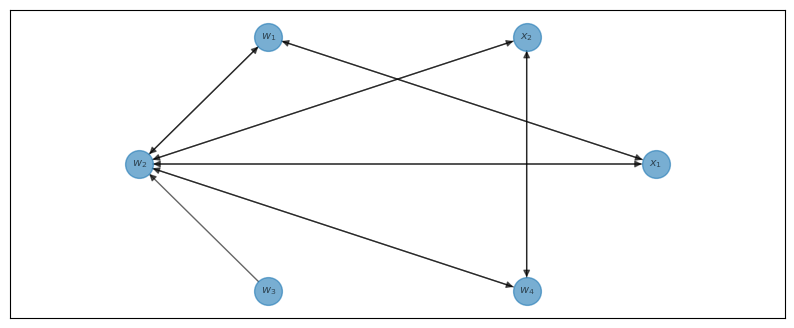

In [16]:
graph_discovery.plot_graph(type_label=False)

# Example 4

$$\begin{matrix}x_1&=&w_1\\x_2&=&x_1^3+1+0.1w_2\\x_3&=&(x_1+2)^3+0.1w_3\end{matrix} $$

In [17]:
key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))
X1=W[:,0]
X2=X1**3+1+0.1*W[:,1]
X3=(X1+2)**3+0.1*W[:,2]
X=np.concatenate([np.stack([X1,X2,X3],axis=1),W],axis=1)
node_names=['$x_1$','$x_2$','$x_3$','$w_1$','$w_2$','$w_3$','$w_4$']  

In [18]:
graph_discovery=CHD.GraphDiscovery(X,node_names)

Finding ancestors:   0%|          | 0/7 [00:00<?, ?it/s, Finding ancestors of $x_1$]

Finding ancestors: 100%|██████████| 7/7 [00:20<00:00,  2.91s/it, Finding ancestors of $w_4$]

Kernel [linear] has n/(n+s)=2.1915256366129756e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=1.3925800235399179e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.003112971611635594, Z=(0.84, 0.87), gamma=1.25e-01
$x_1$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $x_1$: ['$w_1$']



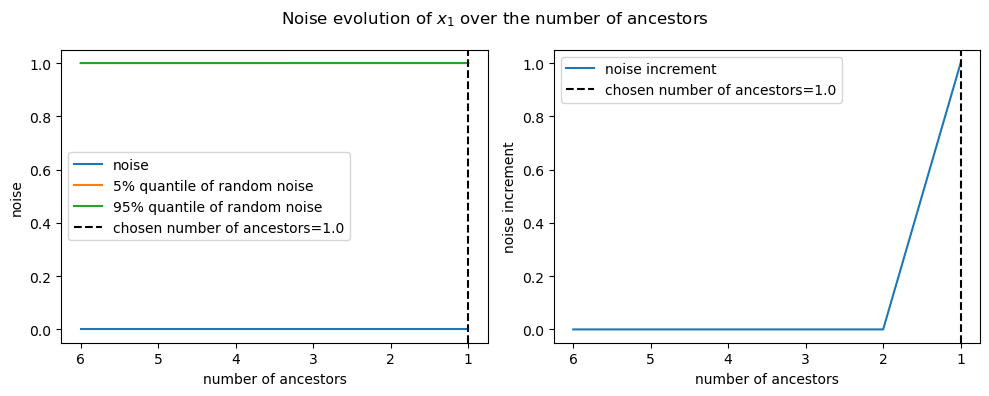

Kernel [linear] has n/(n+s)=0.907983908628638, Z=(1.00, 1.00), gamma=3.65e+02
Kernel [quadratic] has n/(n+s)=2.421469353340968e-09, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.013096659340034223, Z=(0.84, 0.87), gamma=1.39e-01
$x_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $x_2$: ['$x_1$', '$x_3$', '$w_1$', '$w_2$', '$w_3$']



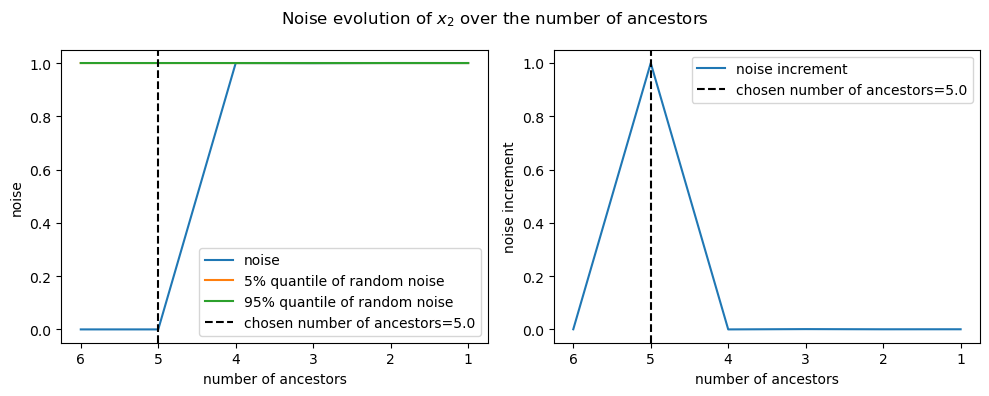

Kernel [linear] has n/(n+s)=0.88554541468443, Z=(1.00, 1.00), gamma=2.40e+02
Kernel [quadratic] has n/(n+s)=2.5539439753586557e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.0009597102974142921, Z=(0.84, 0.87), gamma=1.32e-01
$x_3$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $x_3$: ['$x_1$', '$x_2$', '$w_1$', '$w_2$', '$w_3$']



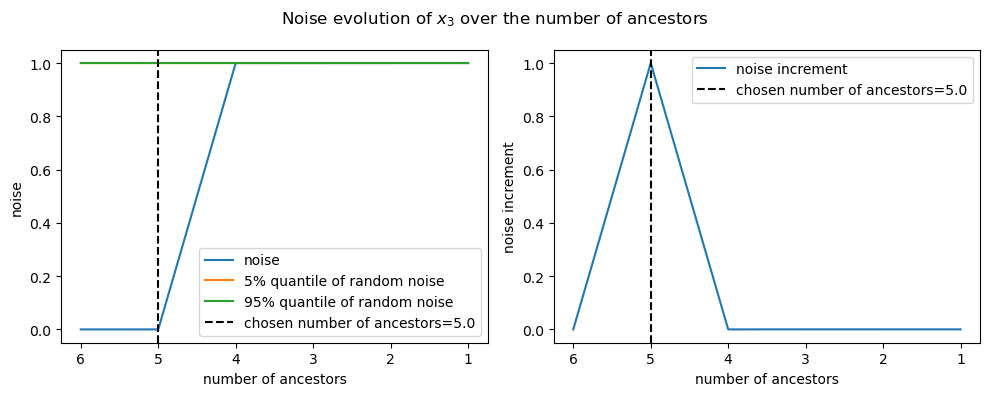

Kernel [linear] has n/(n+s)=2.1915271346269647e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=1.3925591866537034e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.003112971611629095, Z=(0.84, 0.87), gamma=1.25e-01
$w_1$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $w_1$: ['$x_1$']



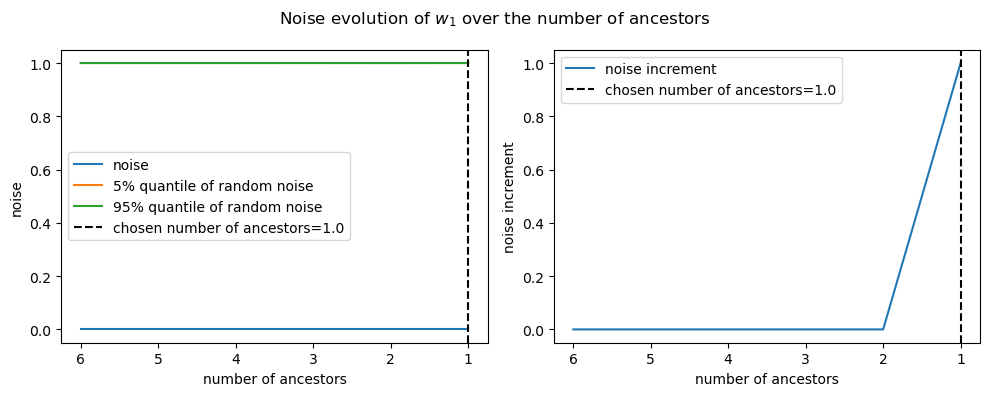

Kernel [linear] has n/(n+s)=0.9965027935028195, Z=(1.00, 1.00), gamma=9.85e+02
Kernel [quadratic] has n/(n+s)=4.215680383129874e-06, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.035093149020202594, Z=(0.89, 0.92), gamma=1.26e-03
$w_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $w_2$: ['$x_1$', '$x_2$', '$x_3$', '$w_1$', '$w_3$']



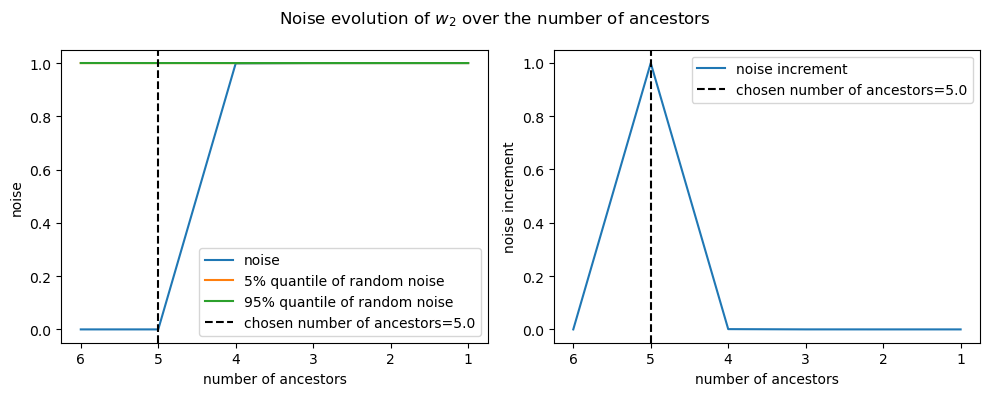

Kernel [linear] has n/(n+s)=0.9996671704572304, Z=(1.00, 1.00), gamma=9.98e+02
Kernel [quadratic] has n/(n+s)=2.3507205770844808e-08, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.035274139825058455, Z=(0.90, 0.93), gamma=6.32e-04
$w_3$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00)
Ancestors of $w_3$: ['$x_1$', '$x_2$', '$x_3$', '$w_1$', '$w_2$']



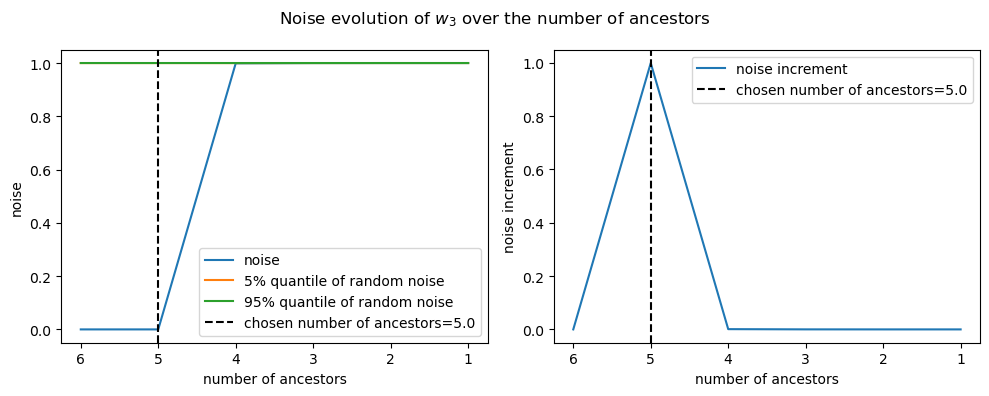

Kernel [linear] has n/(n+s)=0.9997767879719717, Z=(1.00, 1.00), gamma=9.98e+02
Kernel [quadratic] has n/(n+s)=0.9983163998796099, Z=(1.00, 1.00), gamma=9.90e+02
Kernel [gaussian] has n/(n+s)=0.9309536669795929, Z=(0.92, 0.94), gamma=2.81e-04
$w_4$ has no ancestors



In [19]:
graph_discovery.fit()

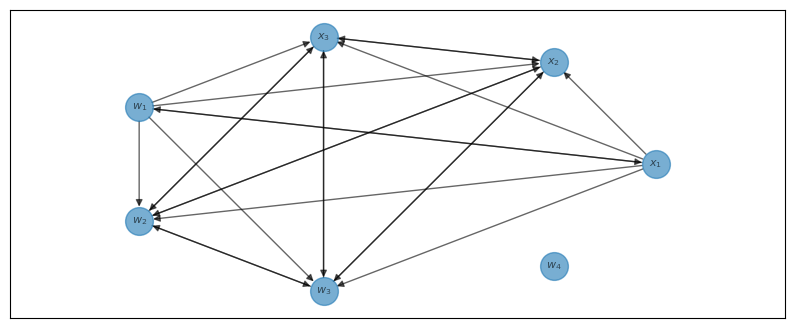

In [20]:
graph_discovery.plot_graph(type_label=False)